# Import required libraries

In [1]:
#import fundamental libraries
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns

#Import Sentimental Analysis (Varder) libraries
!pip install vaderSentiment
import nltk
nltk.download('punkt')  # Download the necessary data for tokenization 
nltk.download('averaged_perceptron_tagger')  # Download data for POS tagging
nltk.download('maxent_ne_chunker')  # Download the data for named entity chunking 
nltk.download('words')
nltk.download('vader_lexicon')

from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Sentimental Analysis (Roberta Pretrained Model)
!pip install transformers



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to C:\Users\Yomal
[nltk_data]     Sandaruwan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yomal Sandaruwan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Yomal
[nltk_data]     Sandaruwan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Yomal
[nltk_data]     Sandaruwan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Yomal
[nltk_data]     Sandaruwan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# read the csv data
customer_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_customers_dataset.csv')
order_items_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_order_items_dataset.csv')
payment_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_order_payments_dataset.csv')
orders_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_orders_dataset.csv')
product_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_products_dataset.csv')
seller_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_sellers_dataset.csv')


In [3]:
# Character Encording
import chardet

# Detect the file's encoding
with open('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_order_reviews_dataset_en.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
encoding = result['encoding']

#read the data frame
review_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/olist_order_reviews_dataset_en.csv', encoding=encoding)
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Unnamed: 7
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,1/18/2018 0:00,1/18/2018 21:46,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,3/10/2018 0:00,3/11/2018 3:05,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2/17/2018 0:00,2/18/2018 14:36,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,I received well before the deadline.,4/21/2017 0:00,4/21/2017 22:02,NaN
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations Lannister Stores I loved buyin...,3/1/2018 0:00,3/2/2018 10:26,NaN
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,7/7/2018 0:00,7/14/2018 17:18,NaN
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,12/9/2017 0:00,12/11/2017 20:06,NaN
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excellent backpack, super fast delivery. Super...",3/22/2018 0:00,3/23/2018 9:10,NaN
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,7/1/2018 0:00,7/2/2018 12:59,NaN


In [4]:
# Identify the product catergories
unique_product = product_df['product_category_name_english'].unique()
print(unique_product)
print("Number of product catergories : ", len(unique_product))

['perfumery' 'art' 'sports_leisure' 'baby' 'housewares'
 'musical_instruments' 'cool_stuff' 'furniture_decor' 'home_appliances'
 'toys' 'bed_bath_table' 'construction_tools_safety'
 'computers_accessories' 'health_beauty' 'luggage_accessories'
 'garden_tools' 'office_furniture' 'auto' 'electronics' 'fashion_shoes'
 'telephony' 'stationery' 'fashion_bags_accessories' 'computers'
 'home_construction' 'watches_gifts' 'construction_tools_construction'
 'pet_shop' 'small_appliances' 'agro_industry_and_commerce' nan
 'furniture_living_room' 'signaling_and_security' 'air_conditioning'
 'consoles_games' 'books_general_interest' 'costruction_tools_tools'
 'fashion_underwear_beach' 'fashion_male_clothing'
 'kitchen_dining_laundry_garden_furniture'
 'industry_commerce_and_business' 'fixed_telephony'
 'construction_tools_lights' 'books_technical' 'home_appliances_2'
 'party_supplies' 'drinks' 'market_place' 'la_cuisine'
 'costruction_tools_garden' 'fashio_female_clothing' 'home_confort'
 'audio' '

According to the above there 72 product categories in the data set.

In [5]:
# identify the data frames' shape
print("Customer",customer_df.shape)
print("item",order_items_df.shape)
print("payments",payment_df.shape)
print("reviews",review_df.shape)
print("orders",orders_df.shape)
print("prodcuts",product_df.shape)
print("sellers",seller_df.shape)

Customer (99441, 5)
item (112650, 7)
payments (103886, 5)
reviews (99224, 8)
orders (99441, 8)
prodcuts (32951, 10)
sellers (3095, 4)


### Creating the Master Record by Merging the data set

This includes all the data available in seperated data frames

In [6]:
merged_df1= pd.merge(orders_df,payment_df, on = 'order_id',how='left')
merged_df2 = pd.merge(merged_df1,review_df, on = 'order_id',how='left')
merged_df3 = pd.merge(merged_df2,order_items_df, on = 'order_id',how='left')
merged_df4 = pd.merge(merged_df3,customer_df, on = 'customer_id',how='left')
merged_df5 = pd.merge(merged_df4,product_df, on = 'product_id',how='left')
master_df = pd.merge(merged_df5,seller_df, on = 'seller_id',how='left')
master_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [7]:
master_df.shape

(119143, 41)

### Data Preprocessing

In [8]:
master_df.drop_duplicates(inplace=True)  # Removes duplicate rows from the DataFrame
master_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP


In [9]:
master_df.shape

(119143, 41)

In [10]:
# Convert the "order_purchase_timestamp" column to datetime objects
master_df["order_purchase_timestamp"] = pd.to_datetime(master_df["order_purchase_timestamp"])

# extract the date from date time times stamp
master_df["order_purchase_date"] = master_df['order_purchase_timestamp'].dt.date

# Sort the DataFrame by the "order_purchase_timestamp" column 
master_df = master_df.sort_values(by="order_purchase_timestamp")

master_df = master_df.reset_index(drop=True)
master_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1.0,credit_card,...,426.0,2.0,1400.0,32.0,6.0,28.0,37580.0,monte siao,MG,2016-09-04
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,1.0,credit_card,...,754.0,3.0,1800.0,32.0,6.0,28.0,37580.0,monte siao,MG,2016-09-04
2,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00,1.0,credit_card,...,381.0,1.0,700.0,25.0,2.0,25.0,81050.0,curitiba,PR,2016-09-05
3,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00,1.0,credit_card,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-13
4,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,NaN,NaN,...,1036.0,1.0,1000.0,16.0,16.0,16.0,81810.0,curitiba,PR,2016-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaN,NaN,NaN,2018-10-15 00:00:00,1.0,voucher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-29
119139,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,2018-10-23 00:00:00,1.0,voucher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01
119140,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaN,NaN,NaN,2018-10-16 00:00:00,1.0,voucher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-03
119141,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,2018-11-12 00:00:00,1.0,voucher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-16


In [11]:
# Create csv file from data frame
master_df.to_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/master1.csv')

In [12]:
#group the data frame according to the analysis and find the derive the sales qty
master_data = master_df.groupby(['order_purchase_date','product_category_name_english','review_comment_message','payment_type','customer_state']).agg({'customer_id': 'count','review_score':'mean','price':'sum','freight_value':'sum', 'payment_value':'sum', 'price':'sum', 'product_name_lenght':'mean','product_description_lenght':'mean','product_photos_qty':'mean'})                                                                
master_df = pd.DataFrame(master_data)

# Define the sales qty column
master_df = master_df.rename(columns={'customer_id': 'sales_qty'})
master_df['review_score'] = master_df['review_score'].round()

# Create a new 'ID' column with unique IDs
master_df['ID'] = range(1, len(master_df) + 1)
# Reorder the columns with 'ID' as the first column
master_df = master_df[['ID'] + [col for col in master_df if col != 'ID']]

master_df

ID  \
order_purchase_date product_category_name_english           review_comment_message                             payment_type customer_state          
2016-09-04          furniture_decor                         1 month delay in delivery !!! last purchase I do   credit_card  RR                  1   
2016-09-05          telephony                               I bought two products from this Lannister's par... credit_card  RS                  2   
2016-10-03          furniture_decor                         Delay in delivery, hated the service and never ... credit_card  MG                  3   
                                                            Good afternoon the product came correct, but th... credit_card  SP                  4   
                    sports_leisure                          All very well...                                   boleto       RS                  5   
...                                                                                                                                           ...   
2018-08-29          health_beauty                           The product arrived faster than expected           credit_card  SP              40988   
                    sports_leisure                          Fast delivery, even before the deadline.           credit_card  SP              40989   
                    toys                                    I found the product very small and where is the... credit_card  SP              40990   
                    watches_gifts                           I bought a watch, and when it arrived, I came a... credit_card  SP              40991   
2018-09-03          kitchen_dining_laundry_garden_furniture Not received                                       voucher      SP              40992   

                                                                                                                                            sales_qty  \
order_purchase_date product_category_name_english           review_comment_message                             payment_type customer_state              
2016-09-04          furniture_decor                         1 month delay in delivery !!! last purchase I do   credit_card  RR                      2   
2016-09-05          telephony                               I bought two products from this Lannister's par... credit_card  RS                      1   
2016-10-03          furniture_decor                         Delay in delivery, hated the service and never ... credit_card  MG                      1   
                                                            Good afternoon the product came correct, but th... credit_card  SP                      1   
                    sports_leisure                          All very well...                                   boleto       RS                      1   
...                                                                                                                                               ...   
2018-08-29          health_beauty                           The product arrived faster than expected           credit_card  SP                      1   
                    sports_leisure                          Fast delivery, even before the deadline.           credit_card  SP                      1   
                    toys                                    I found the product very small and where is the... credit_card  SP                      1   
                    watches_gifts                           I bought a watch, and when it arrived, I came a... credit_card  SP                      1   
2018-09-03          kitchen_dining_laundry_garden_furniture Not received                                       voucher      SP                      1   

                                                                                                                                            review_score  \
order_purchase_date product_category_name_english          

In [13]:
# Create the csv from finalized data frame
master_df.to_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/master.csv', index=True)

### EDA (Exploratory Data Analysis)

In [14]:
# read the created master.csv
final_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/master.csv')

In [15]:
# Convert Order Purchase date to date and time
final_df['order_purchase_date'] = pd.to_datetime(final_df['order_purchase_date'])
# Extract the year_month from the 'Date' column
final_df['Month_Year'] = final_df['order_purchase_date'].dt.strftime('%b-%Y')
# Extract the year from the 'Date' column
final_df['Year'] = final_df['order_purchase_date'].dt.year
# Extract the year from the 'Date' column
final_df['Month'] = final_df['order_purchase_date'].dt.month

# create new column for total purshased production value
final_df['Product_Order_Value'] = final_df['price'] * final_df['sales_qty']

final_df

,order_purchase_date,product_category_name_english,review_comment_message,payment_type,customer_state,ID,sales_qty,review_score,price,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,Month_Year,Year,Month,Product_Order_Value
0,2016-09-04,furniture_decor,1 month delay in delivery !!! last purchase I do,credit_card,RR,1,2,1.0,72.89,63.34,272.46,50.0,590.0,2.5,Sep-2016,2016,9,145.78
1,2016-09-05,telephony,I bought two products from this Lannister's pa...,credit_card,RS,2,1,1.0,59.50,15.56,75.06,42.0,381.0,1.0,Sep-2016,2016,9,59.50
2,2016-10-03,furniture_decor,"Delay in delivery, hated the service and never...",credit_card,MG,3,1,1.0,74.90,17.37,92.27,55.0,248.0,1.0,Oct-2016,2016,10,74.90
3,2016-10-03,furniture_decor,"Good afternoon the product came correct, but t...",credit_card,SP,4,1,1.0,119.90,13.56,133.46,55.0,130.0,1.0,Oct-2016,2016,10,119.90
4,2016-10-03,sports_leisure,All very well...,boleto,RS,5,1,4.0,21.90,17.19,39.09,39.0,518.0,1.0,Oct-2016,2016,10,21.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40987,2018-08-29,health_beauty,The product arrived faster than expected,credit_card,SP,40988,1,5.0,65.00,9.21,74.21,12.0,2411.0,1.0,Aug-2018,2018,8,65.00
40988,2018-08-29,sports_leisure,"Fast delivery, even before the deadline.",credit_card,SP,40989,1,5.0,6.90,7.39,14.29,33.0,73.0,3.0,Aug-2018,2018,8,6.90
40989,2018-08-29,toys,I found the product very small and where is th...,credit_card,SP,40990,1,1.0,63.90,9.20,73.10,52.0,711.0,2.0,Aug-2018,2018,8,63.90
40990,2018-08-29,watches_gifts,"I bought a watch, and when it arrived, I came ...",credit_card,SP,40991,1,1.0,99.00,7.95,106.95,46.0,531.0,6.0,Aug-2018,2018,8,99.00


In [16]:
#yearly revenue of the organization
revenue_table = final_df.groupby('Year')['Product_Order_Value'].agg('sum')
print(revenue_table)

Year
2016      52373.06
2017    4458445.93
2018    4543294.33
Name: Product_Order_Value, dtype: float64


According to above it can be identified that there is an issue with the consistency of the data.
2016 revenue is abnormally less that other years. This can leads to error of the model development.
Hence, 2016 data has been droped out from the data frame and continue the research with 2017 and 2018 sales data.

In [17]:
# Drop rows with the year 2016 due few data and inconsistancy
final_df = final_df[final_df['Year'] != 2016]
# Reset the index
final_df = final_df.reset_index(drop=True)
#Reset the ID for records
final_df['ID'] = range(1, len(final_df) + 1)

In [18]:
#finding the unique product catergories
unique_product = final_df['product_category_name_english'].unique()
len(unique_product)

71

In [19]:
#yearly revenue of the product catergory
revenue_product_table = final_df.groupby(['Year','product_category_name_english']).agg({'sales_qty':'sum','Product_Order_Value':'sum'})
revenue_product_df = pd.DataFrame(revenue_product_table)
revenue_product_df = revenue_product_df.reset_index(drop=False)

#fitered out the 2017 and 2018 data excluding the 2016
revenue_product_df_2017 = revenue_product_df[revenue_product_df['Year'] == 2017]
revenue_product_df_2018 = revenue_product_df[revenue_product_df['Year'] == 2018]

Below analysis is done to the identify the most revenue contributed product catergories.
Here the contribution to the revenue from each catergory has been identify using the revenue earning percentage. 80% revenue margin has been used for the filtering.

In [20]:
#identify the most revenue generated product catergories in 2017
revenue_product_df_2017['Percentage'] =  (revenue_product_df_2017['Product_Order_Value']/ revenue_product_df_2017['Product_Order_Value'].sum())*100
revenue_product_df_2017 = revenue_product_df_2017.sort_values(by='Percentage', ascending=False)
revenue_product_df_2017['Cummulative_Percentage'] = revenue_product_df_2017['Percentage'].cumsum()

#
mask = revenue_product_df_2017['Cummulative_Percentage'] <= 80
revenue_product_df_2017 = revenue_product_df_2017[mask]

revenue_product_df_2017 = revenue_product_df_2017.reset_index(drop=True)
revenue_product_df_2017

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_14836\2051779687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_product_df_2017['Percentage'] =  (revenue_product_df_2017['Product_Order_Value']/ revenue_product_df_2017['Product_Order_Value'].sum())*100


,Year,product_category_name_english,sales_qty,Product_Order_Value,Percentage,Cummulative_Percentage
0,2017,garden_tools,1233,613103.35,13.751504,13.751504
1,2017,bed_bath_table,2631,405519.01,9.095524,22.847027
2,2017,computers_accessories,1365,321083.38,7.201688,30.048716
3,2017,furniture_decor,1887,285332.31,6.399815,36.448531
4,2017,sports_leisure,1593,268801.11,6.029032,42.477563
5,2017,watches_gifts,1062,257459.05,5.774637,48.252199
6,2017,health_beauty,1556,256702.90,5.757677,54.009876
7,2017,cool_stuff,1023,201621.65,4.522241,58.532116
8,2017,auto,758,198654.51,4.455690,62.987806
9,2017,housewares,1301,188571.77,4.229540,67.217346


In [21]:
#identify the most revenue generated product catergories in 2018
revenue_product_df_2018['Percentage'] =  (revenue_product_df_2018['Product_Order_Value']/ revenue_product_df_2018['Product_Order_Value'].sum())*100
revenue_product_df_2018 = revenue_product_df_2018.sort_values('Percentage', ascending=False)
revenue_product_df_2018['Cummulative_Percentage'] = revenue_product_df_2018['Percentage'].cumsum()
mask = revenue_product_df_2018['Cummulative_Percentage'] <= 80
revenue_product_df_2018 = revenue_product_df_2018[mask]
revenue_product_df_2018 = revenue_product_df_2018.reset_index(drop=True)
revenue_product_df_2018

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_14836\2708737699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_product_df_2018['Percentage'] =  (revenue_product_df_2018['Product_Order_Value']/ revenue_product_df_2018['Product_Order_Value'].sum())*100


,Year,product_category_name_english,sales_qty,Product_Order_Value,Percentage,Cummulative_Percentage
0,2018,bed_bath_table,2898,410571.81,9.036875,9.036875
1,2018,computers_accessories,2022,401418.17,8.835399,17.872273
2,2018,watches_gifts,1720,394001.94,8.672164,26.544437
3,2018,health_beauty,2279,366704.33,8.071331,34.615769
4,2018,sports_leisure,1919,290464.41,6.393255,41.009024
5,2018,furniture_decor,1761,275085.09,6.054749,47.063773
6,2018,housewares,1753,274859.85,6.049792,53.113565
7,2018,auto,1169,199049.93,4.381181,57.494746
8,2018,baby,732,189199.50,4.164368,61.659114
9,2018,office_furniture,462,167724.11,3.691685,65.350799


In [22]:
#identify the most revenue generated product catergories in both 2017/2018
revenue_product_table17_18 = final_df.groupby('product_category_name_english').agg({'sales_qty':'sum','Product_Order_Value':'sum'})
revenue_product_df17_18 = pd.DataFrame(revenue_product_table17_18)
revenue_product_df17_18 = revenue_product_df17_18.reset_index(drop=False)

revenue_product_df17_18['Percentage_Revenue'] =  (revenue_product_df17_18['Product_Order_Value']/ revenue_product_df17_18['Product_Order_Value'].sum())*100
revenue_product_df17_18['Percentage_Sales'] =  (revenue_product_df17_18['sales_qty']/ revenue_product_df17_18['sales_qty'].sum())*100

revenue_product_df17_18 = revenue_product_df17_18.sort_values('Percentage_Revenue', ascending=False)
revenue_product_df17_18['Cummulative_Percentage'] = revenue_product_df17_18['Percentage_Revenue'].cumsum()
mask = revenue_product_df17_18['Cummulative_Percentage'] <= 80
revenue_product_df17_18 = revenue_product_df17_18[mask]
revenue_product_df17_18 = revenue_product_df17_18.reset_index(drop=True)
revenue_product_df17_18

,product_category_name_english,sales_qty,Product_Order_Value,Percentage_Revenue,Percentage_Sales,Cummulative_Percentage
0,bed_bath_table,5529,816090.82,9.065923,11.379587,9.065923
1,garden_tools,2164,755906.00,8.397332,4.453866,17.463255
2,computers_accessories,3387,722501.55,8.026243,6.971000,25.489498
3,watches_gifts,2782,651460.99,7.237056,5.725811,32.726554
4,health_beauty,3835,623407.23,6.925408,7.893058,39.651962
5,furniture_decor,3648,560417.40,6.225656,7.508181,45.877618
6,sports_leisure,3512,559265.52,6.212860,7.228271,52.090478
7,housewares,3054,463431.62,5.148245,6.285632,57.238723
8,auto,1927,397704.44,4.418084,3.966081,61.656806
9,cool_stuff,1661,317966.10,3.532274,3.418610,65.189080


- Above data frames show the top revenue earned products in 2017 and 2018 which covers the 80% revenue of the sales. 
- Out of 72 product catergories only 14 products generate the 80% of the sales. 
- For the demand forecasting, maximum revenue earning product has been considered to generate better revenue in the business.

<function matplotlib.pyplot.show(close=None, block=None)>

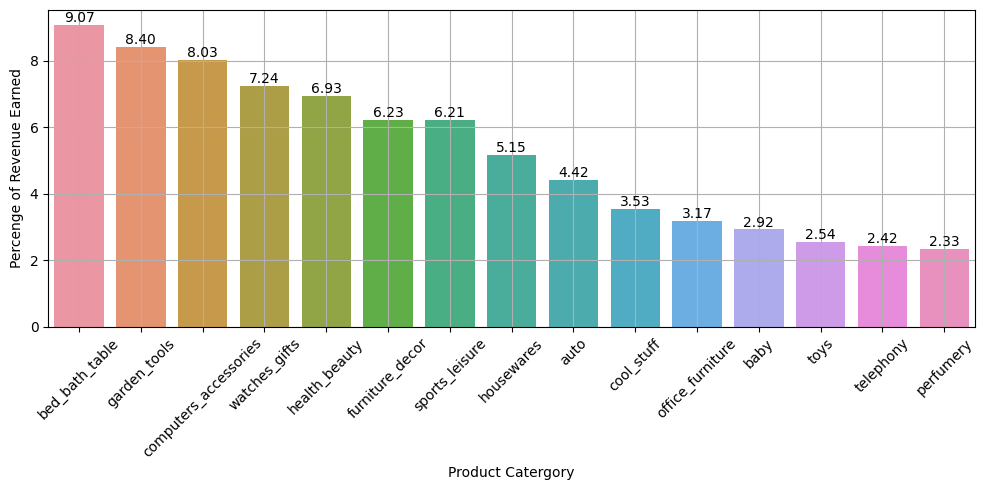

In [23]:
plt.figure(figsize=(10,5))

# Create a side-by-side bar chart
ax1 = sns.barplot(data=revenue_product_df17_18, x='product_category_name_english', y='Percentage_Revenue', label='Percentage Revenue')
for i, p in enumerate(ax1.patches[:len(revenue_product_df17_18)]):
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Product Catergory')
plt.ylabel('Percenge of Revenue Earned')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

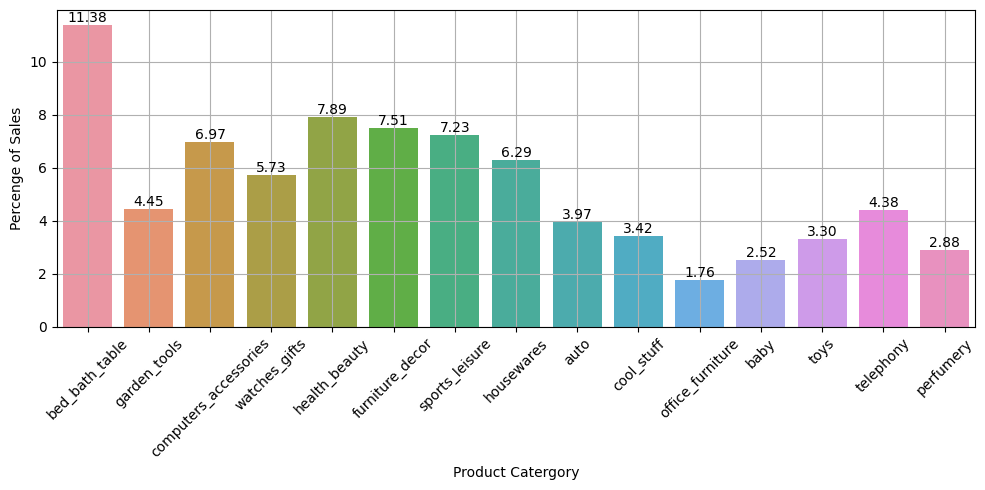

In [24]:
plt.figure(figsize=(10,5))
ax2 = sns.barplot(data=revenue_product_df17_18, x='product_category_name_english', y='Percentage_Sales')
for i, p in enumerate(ax2.patches[:len(revenue_product_df17_18)]):
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Product Catergory')
plt.ylabel('Percenge of Sales')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

### Filtered revenue earned catergories. 

In [25]:
revenue_cat = revenue_product_df17_18['product_category_name_english'].unique()
numpy_array = np.array(revenue_cat)
revenue_list = numpy_array.tolist()
print(revenue_list)

#filtered Data frame
final_df = final_df[final_df['product_category_name_english'].isin(revenue_list)]

['bed_bath_table', 'garden_tools', 'computers_accessories', 'watches_gifts', 'health_beauty', 'furniture_decor', 'sports_leisure', 'housewares', 'auto', 'cool_stuff', 'office_furniture', 'baby', 'toys', 'telephony', 'perfumery']


In [26]:
final_df

,order_purchase_date,product_category_name_english,review_comment_message,payment_type,customer_state,ID,sales_qty,review_score,price,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,Month_Year,Year,Month,Product_Order_Value
0,2017-01-05,auto,"I loved the product, matches the images, the d...",boleto,PR,1,1,5.0,10.9,8.72,19.62,52.0,1367.0,1.0,Jan-2017,2017,1,10.9
1,2017-01-05,auto,"Very good seller, arrived well before the dead...",boleto,PR,2,1,5.0,10.9,8.72,19.62,52.0,1367.0,1.0,Jan-2017,2017,1,10.9
2,2017-01-05,baby,"Fast delivery, product with quality and great ...",boleto,PR,3,1,5.0,9.9,8.72,18.62,42.0,1183.0,1.0,Jan-2017,2017,1,9.9
3,2017-01-05,baby,The product was of great quality and the deliv...,boleto,PR,4,1,5.0,11.9,8.72,20.62,40.0,1890.0,1.0,Jan-2017,2017,1,11.9
22,2017-01-05,toys,I highly recommend Targaryen,boleto,PR,23,1,5.0,8.9,8.72,17.62,63.0,2136.0,1.0,Jan-2017,2017,1,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40759,2018-08-29,health_beauty,I recommend,voucher,MG,40760,1,5.0,45.9,15.39,61.29,26.0,394.0,1.0,Aug-2018,2018,8,45.9
40760,2018-08-29,health_beauty,The product arrived faster than expected,credit_card,SP,40761,1,5.0,65.0,9.21,74.21,12.0,2411.0,1.0,Aug-2018,2018,8,65.0
40761,2018-08-29,sports_leisure,"Fast delivery, even before the deadline.",credit_card,SP,40762,1,5.0,6.9,7.39,14.29,33.0,73.0,3.0,Aug-2018,2018,8,6.9
40762,2018-08-29,toys,I found the product very small and where is th...,credit_card,SP,40763,1,1.0,63.9,9.20,73.10,52.0,711.0,2.0,Aug-2018,2018,8,63.9


Reveiw Count Distribution

In [27]:
# Review score distribution
value_counts = final_df['review_score'].value_counts()
for value, count in value_counts.items():
    print(f"{value} : {count} : {round((count/value_counts.sum())*100,2)} %")

5.0 : 16116 : 50.02 %
1.0 : 6753 : 20.96 %
4.0 : 4698 : 14.58 %
3.0 : 2903 : 9.01 %
2.0 : 1748 : 5.43 %


In [28]:
value_counts.sum()

32218

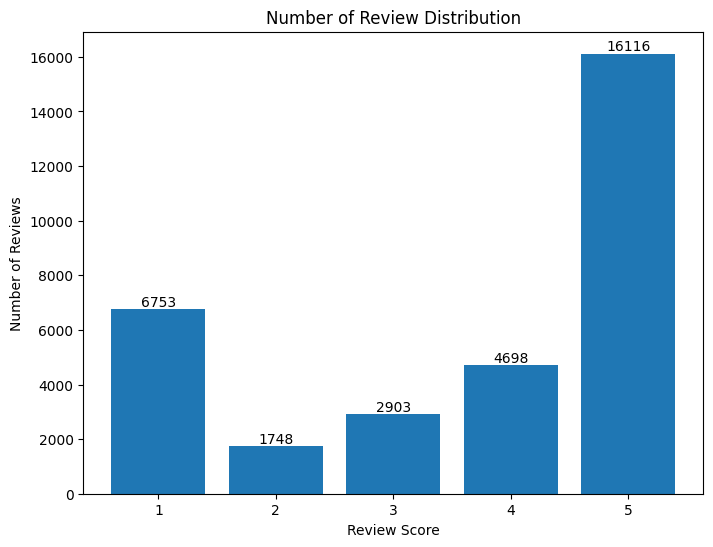

In [29]:
plt.figure(figsize = (8,6))
bars = plt.bar(value_counts.index,value_counts.values)
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Review Distribution')

# Annotate each bar with its count
for bar, count in zip(bars, value_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

plt.show()

Sales Distribution

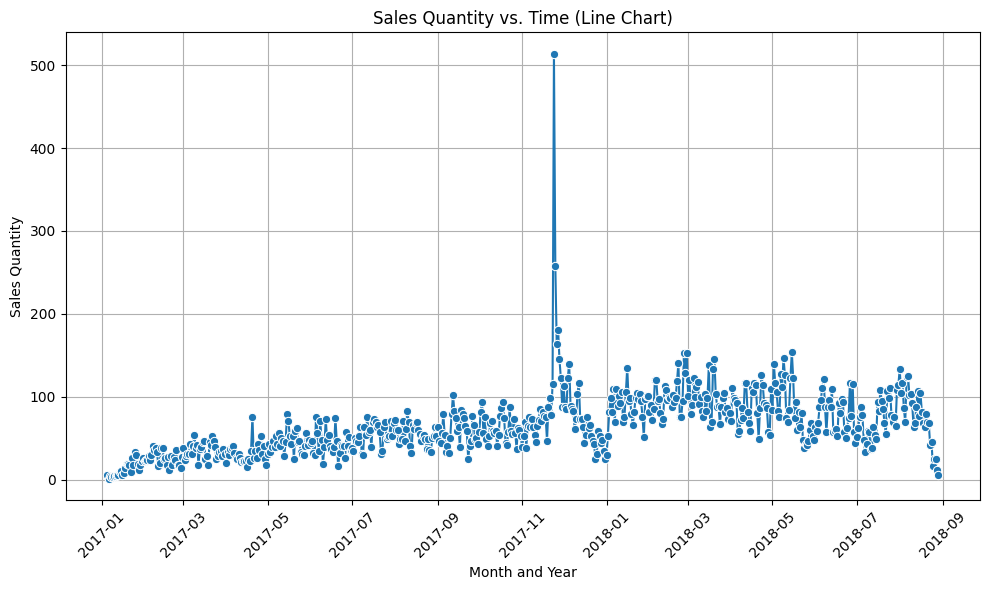

In [30]:
sales_pattern = final_df.groupby('order_purchase_date')['sales_qty'].agg('sum')
sales_df = pd.DataFrame(sales_pattern)
# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_purchase_date', y='sales_qty', data=sales_df, marker='o')

plt.title('Sales Quantity vs. Time (Line Chart)')
plt.xlabel('Month and Year')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Revenue Distribution

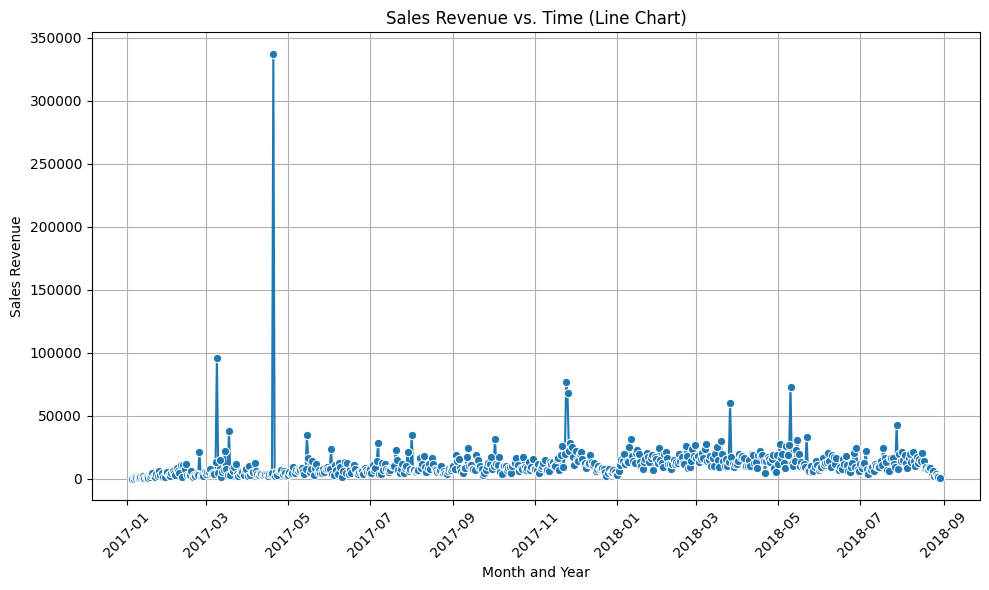

In [31]:
sales_pattern = final_df.groupby('order_purchase_date')['Product_Order_Value'].agg('sum')
sales_df = pd.DataFrame(sales_pattern)
# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_purchase_date', y='Product_Order_Value', data=sales_df, marker='o')

plt.title('Sales Revenue vs. Time (Line Chart)')
plt.xlabel('Month and Year')
plt.ylabel('Sales Revenue')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [32]:
monthly_sales_table = final_df.groupby('Month_Year')['sales_qty'].agg('sum')

# Reset the index to make 'Month_Year' a column
monthly_sales_table = monthly_sales_table.reset_index()

# Convert to a dataframe
monthly_sales_table = pd.DataFrame(monthly_sales_table)

monthly_sales_table

,Month_Year,sales_qty
0,Apr-2017,931
1,Apr-2018,2645
2,Aug-2017,1691
3,Aug-2018,2161
4,Dec-2017,2130
5,Feb-2017,726
6,Feb-2018,2819
7,Jan-2017,350
8,Jan-2018,2751
9,Jul-2017,1683


In [33]:
# Convert the "Month_Year" column to datetime type
monthly_sales_table['Month_Year'] = pd.to_datetime(monthly_sales_table['Month_Year'], format='%b-%Y')

# Sort the DataFrame by the "Month_Year" column in ascending order
monthly_sales_table = monthly_sales_table.sort_values(by='Month_Year')


Sales Quantity vs Product Catergory in 2016/17

In [34]:
# Number of Sales by Year
sales_by_cat= final_df.groupby(['product_category_name_english','Year']).agg({'sales_qty':'sum','Product_Order_Value':'sum'})

# Reset the index to make 'Month_Year' a column
sales_by_cat = sales_by_cat.reset_index()

sales_by_cat_df = pd.DataFrame(sales_by_cat)
sales_by_cat_df = sales_by_cat_df.sort_values(by='sales_qty', ascending=False)
sales_by_cat = sales_by_cat.reset_index()
sales_by_cat_df = sales_by_cat_df.head(30)
sales_by_cat_df

,product_category_name_english,Year,sales_qty,Product_Order_Value
5,bed_bath_table,2018,2898,410571.81
4,bed_bath_table,2017,2631,405519.01
15,health_beauty,2018,2279,366704.33
7,computers_accessories,2018,2022,401418.17
23,sports_leisure,2018,1919,290464.41
10,furniture_decor,2017,1887,285332.31
11,furniture_decor,2018,1761,275085.09
17,housewares,2018,1753,274859.85
29,watches_gifts,2018,1720,394001.94
22,sports_leisure,2017,1593,268801.11


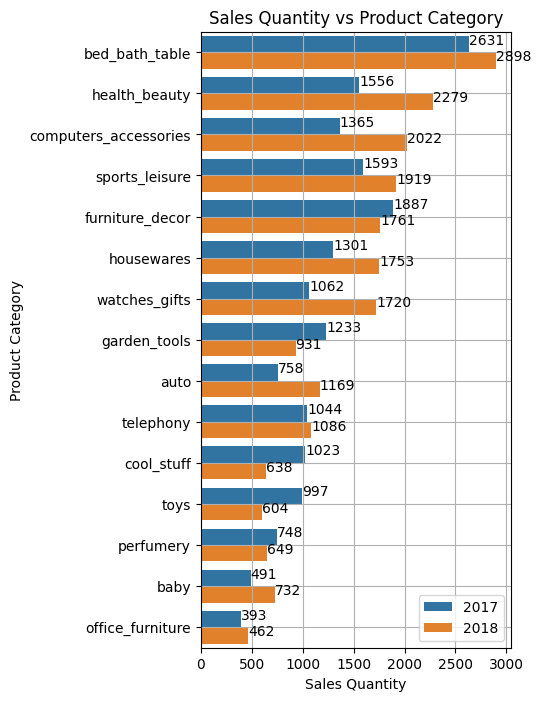

In [35]:
plt.figure(figsize=(4, 8))

ax = sns.barplot(x='sales_qty', y='product_category_name_english', data=sales_by_cat_df, orient='h', hue='Year')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha="left")

plt.xlabel('Sales Quantity')
plt.ylabel('Product Category')
plt.title('Sales Quantity vs Product Category')
plt.legend(title='Year')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Sales Revenue vs Product Catergory

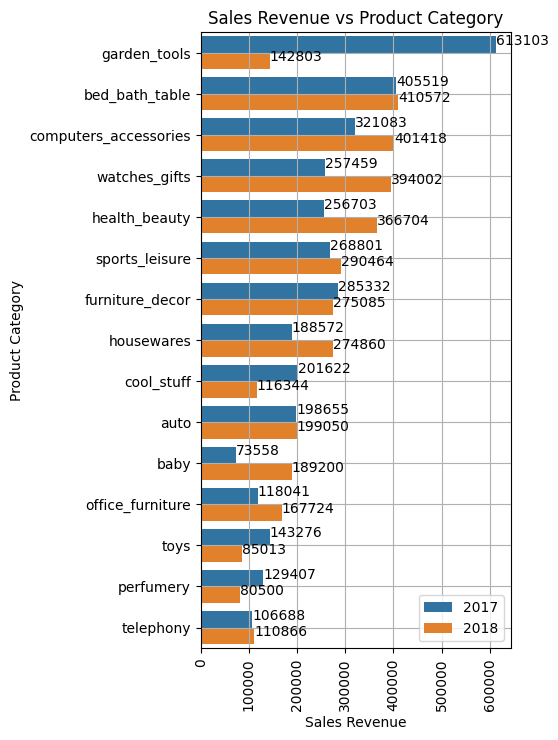

In [36]:
revenue_by_cat_df = sales_by_cat_df.sort_values(by='Product_Order_Value', ascending=False)
plt.figure(figsize=(4, 8))

ax = sns.barplot(x='Product_Order_Value', y='product_category_name_english', data=revenue_by_cat_df, orient='h', hue='Year')

# Add data labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha="left")

plt.xlabel('Sales Revenue')
plt.ylabel('Product Category')
plt.title('Sales Revenue vs Product Category')
plt.xticks(rotation = 90)
plt.legend(title='Year')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Sentiment Analysis

Testing the Sentiment Approach

In [37]:
final_df.index

Int64Index([    0,     1,     2,     3,    22,    23,    25,    26,    27,
               28,
            ...
            40754, 40755, 40756, 40757, 40758, 40759, 40760, 40761, 40762,
            40763],
           dtype='int64', length=32218)

In [38]:
txt1 = final_df.at[3, 'review_comment_message']
txt1

'The product was of great quality and the delivery was super fast.'

In [39]:
tokens = nltk.word_tokenize(txt1)
tokens

['The',
 'product',
 'was',
 'of',
 'great',
 'quality',
 'and',
 'the',
 'delivery',
 'was',
 'super',
 'fast',
 '.']

In [40]:
tagged = nltk.pos_tag(tokens)
tagged

[('The', 'DT'),
 ('product', 'NN'),
 ('was', 'VBD'),
 ('of', 'IN'),
 ('great', 'JJ'),
 ('quality', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('delivery', 'NN'),
 ('was', 'VBD'),
 ('super', 'JJ'),
 ('fast', 'NN'),
 ('.', '.')]

In [41]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  product/NN
  was/VBD
  of/IN
  great/JJ
  quality/NN
  and/CC
  the/DT
  delivery/NN
  was/VBD
  super/JJ
  fast/NN
  ./.)


### VADER Seniment Scoring

Use NLTK's Sentiment Intensity Analyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:

1. Stop words are removed
2. Each word is scored and combined to a total score.

In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [43]:
sia.polarity_scores(txt1)

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.8402}

In [44]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(final_df.iterrows(), total=len(final_df)):
    text = str(row['review_comment_message'])
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/32218 [00:00<?, ?it/s]

In [45]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'ID'})
sentiment_scored_df = vaders.merge(final_df,how='left')

#Sentiment Data with Meta Data
sentiment_scored_df.head()

,ID,neg,neu,pos,compound,order_purchase_date,product_category_name_english,review_comment_message,payment_type,customer_state,...,price,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,Month_Year,Year,Month,Product_Order_Value
0,1,0.0,0.738,0.262,0.5994,2017-01-05,auto,"I loved the product, matches the images, the d...",boleto,PR,...,10.9,8.72,19.62,52.0,1367.0,1.0,Jan-2017,2017,1,10.9
1,2,0.0,0.374,0.626,0.9544,2017-01-05,auto,"Very good seller, arrived well before the dead...",boleto,PR,...,10.9,8.72,19.62,52.0,1367.0,1.0,Jan-2017,2017,1,10.9
2,3,0.0,0.631,0.369,0.6249,2017-01-05,baby,"Fast delivery, product with quality and great ...",boleto,PR,...,9.9,8.72,18.62,42.0,1183.0,1.0,Jan-2017,2017,1,9.9
3,4,0.0,0.556,0.444,0.8402,2017-01-05,baby,The product was of great quality and the deliv...,boleto,PR,...,11.9,8.72,20.62,40.0,1890.0,1.0,Jan-2017,2017,1,11.9
4,23,0.0,0.417,0.583,0.4201,2017-01-05,toys,I highly recommend Targaryen,boleto,PR,...,8.9,8.72,17.62,63.0,2136.0,1.0,Jan-2017,2017,1,8.9


In [46]:
sentiment_scored_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'order_purchase_date',
       'product_category_name_english', 'review_comment_message',
       'payment_type', 'customer_state', 'sales_qty', 'review_score', 'price',
       'freight_value', 'payment_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'Month_Year',
       'Year', 'Month', 'Product_Order_Value'],
      dtype='object')

In [47]:
sentiment_scored_df.to_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/ecom.csv', index=False)

### Plot Vader Results

Compound Review Score vs Product Rating

Text(0, 0.5, 'Compound Score')

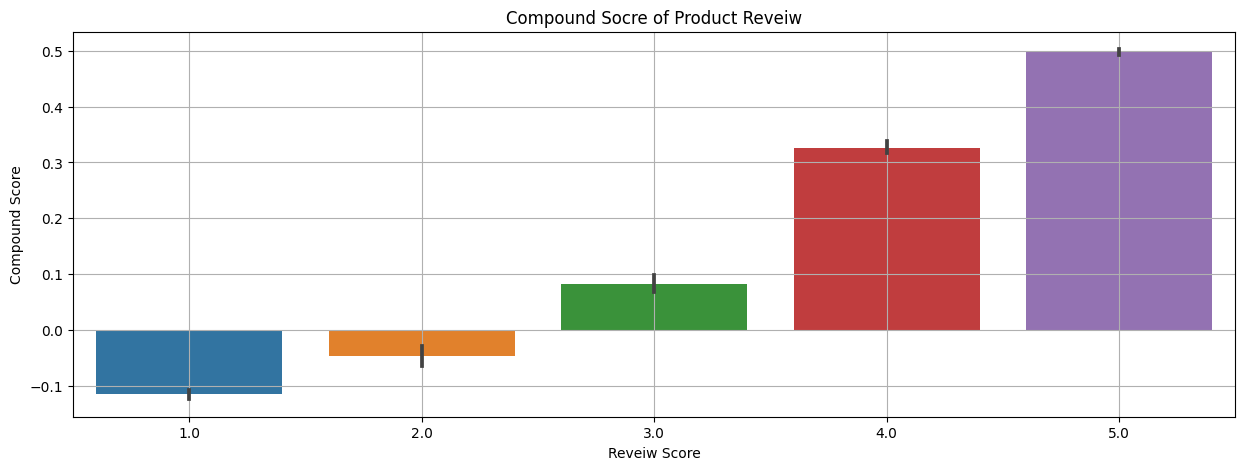

In [48]:
plt.figure(figsize = (15,5))
ax = sns.barplot(data = sentiment_scored_df , x = 'review_score', y = 'compound')
ax.set_title('Compound Socre of Product Reveiw')
plt.grid(True)
plt.xlabel('Reveiw Score')
plt.ylabel('Compound Score')

Postive, Negative, Neutral Review Score vs Product Rating

<function matplotlib.pyplot.show(close=None, block=None)>

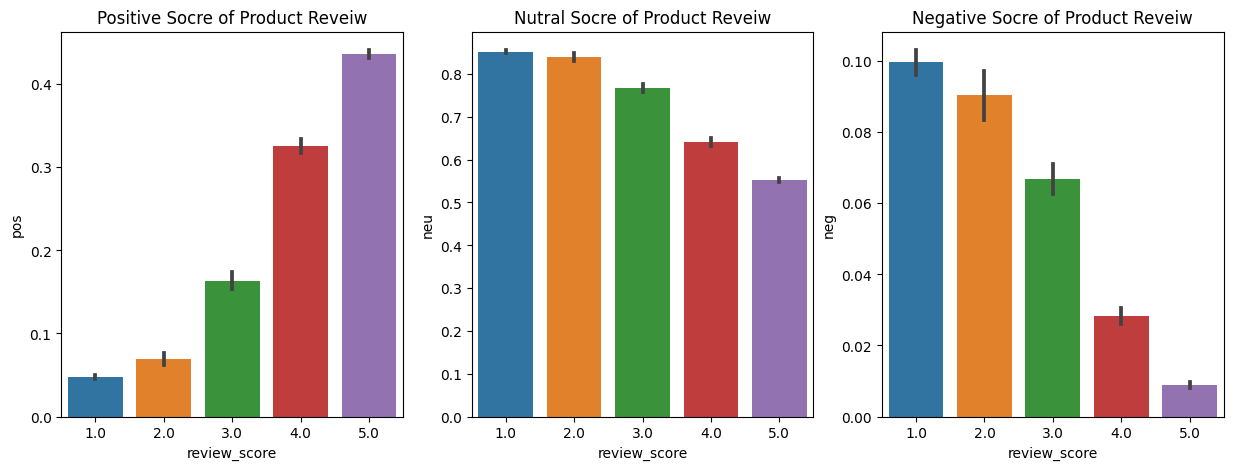

In [49]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(data = sentiment_scored_df , x = 'review_score', y = 'pos',ax = axs[0])
sns.barplot(data = sentiment_scored_df , x = 'review_score', y = 'neu',ax = axs[1])
sns.barplot(data = sentiment_scored_df , x = 'review_score', y = 'neg',ax = axs[2])
axs[0].set_title('Positive Socre of Product Reveiw')
axs[1].set_title('Nutral Socre of Product Reveiw')
axs[2].set_title('Negative Socre of Product Reveiw')
plt.tight_layout
plt.show